In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
df = pd.read_csv("/content/sales_data.csv")
df

,Date,Sales
0,2013-01-01,48.40
1,2013-01-02,49.63
2,2013-01-03,44.66
3,2013-01-04,56.70
4,2013-01-05,62.87
...,...,...
3648,2022-12-28,102.61
3649,2022-12-29,106.32
3650,2022-12-30,95.19
3651,2022-12-31,94.12


In [6]:
df.describe()

,Sales
count,3653.000000
mean,75.139261
std,20.656918
min,18.800000
25%,59.930000
50%,75.240000
75%,89.780000
max,127.060000


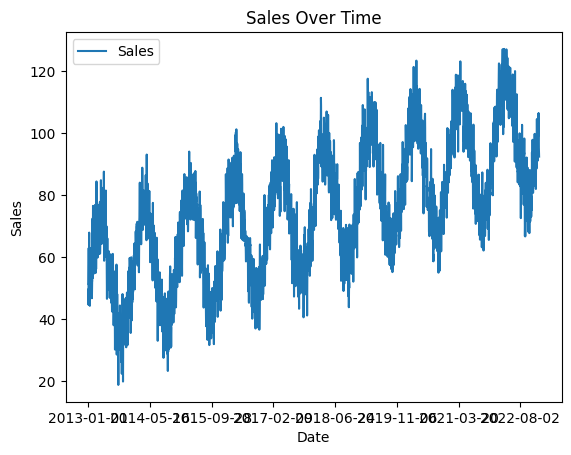

In [8]:
df.set_index('Date').plot()
plt.ylabel('Sales')
plt.xlabel('Date')
plt.title('Sales Over Time')
plt.show()

Data partitioning

In [9]:
#splitting data for train and validation
split_time = int(len(df)*0.8)
train_df = df.iloc[:split_time]
val_df = df.iloc[split_time:]

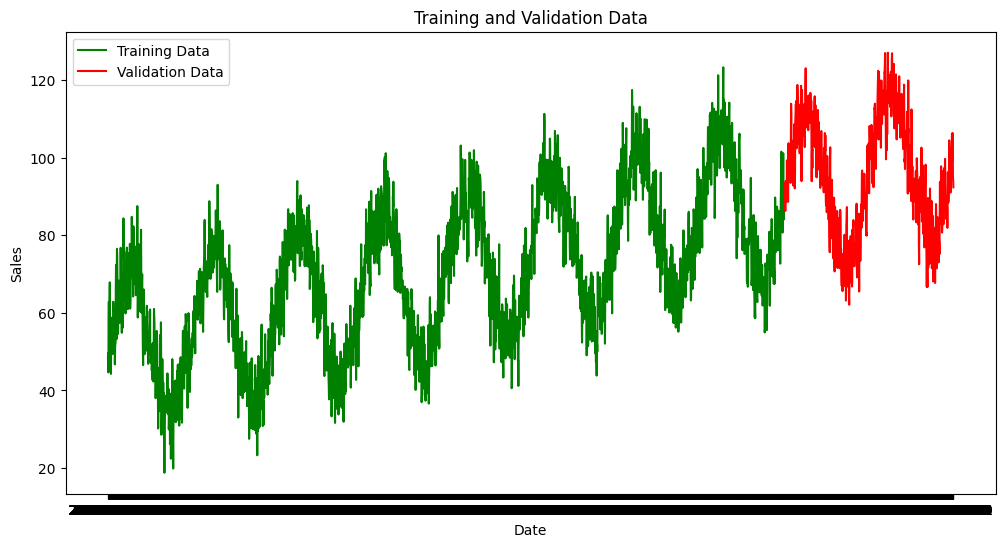

In [11]:
plt.figure(figsize=(12,6))
plt.plot(train_df['Date'],train_df['Sales'], 'green', label='Training Data')
plt.plot(val_df['Date'],val_df['Sales'], 'red', label='Validation Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Training and Validation Data')
plt.legend()

# Naive Forecasting

In [14]:
# apply naive forecasting
df['Naive forecasting'] = df['Sales'].shift(1)
df.head()

,Date,Sales,Naive forecasting
0,2013-01-01,48.40,NaN
1,2013-01-02,49.63,48.40
2,2013-01-03,44.66,49.63
3,2013-01-04,56.70,44.66
4,2013-01-05,62.87,56.70


In [30]:
train_df = df.iloc[:split_time]
val_df = df.iloc[split_time:]
val_df

,Date,Sales,Naive forecasting
2922,2021-01-01,92.12,89.81
2923,2021-01-02,90.97,92.12
2924,2021-01-03,93.43,90.97
2925,2021-01-04,89.58,93.43
2926,2021-01-05,86.28,89.58
...,...,...,...
3648,2022-12-28,102.61,99.20
3649,2022-12-29,106.32,102.61
3650,2022-12-30,95.19,106.32
3651,2022-12-31,94.12,95.19


In [20]:
#function for plotting
def plot(val_df, forecast_df, start_date=None, end_date=None, plot_title='Naive forecasting', forecast_label='Naive forecast'):
  if start_date:
    val_df = val_df[val_df['Date']>=start_date]
    forecast_df = forecast_df[forecast_df['Date']>=start_date]
  if end_date:
    val_df = val_df[val_df['Date']<=end_date]
    forecast_df = forecast_df[forecast_df['Date']<=end_date]

  all_date = val_df['Date']
  plt.figure(figsize=(12,6))
  plt.plot(val_df['Date'],val_df['Sales'], label='validation Date')
  plt.plot(forecast_df['Date'],forecast_df['Naive forecasting'], label='forecast_label')
  plt.xlabel('Date')
  plt.ylabel('Sales')
  plt.title(plot_title)
  # set xticks to every 90th date in the range
  plt.xticks(all_date[::90], rotation=90)
  plt.legend(loc='best')
  plt.tight_layout()
  plt.show()

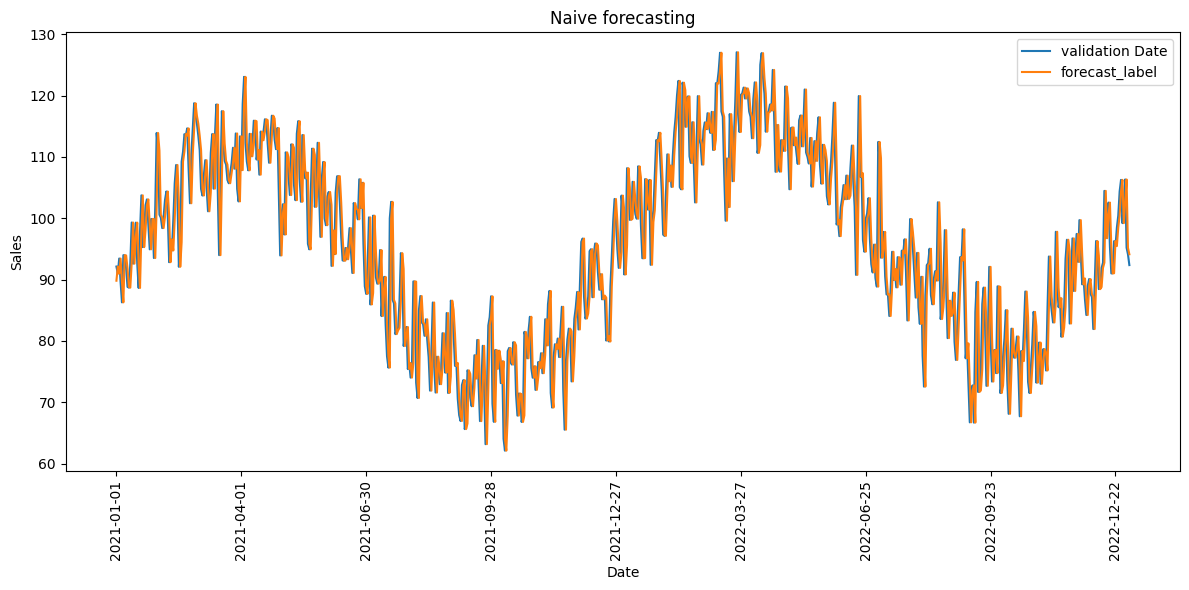

In [31]:
plot(val_df, val_df, plot_title='Naive forecasting', forecast_label='Naive forecasting')

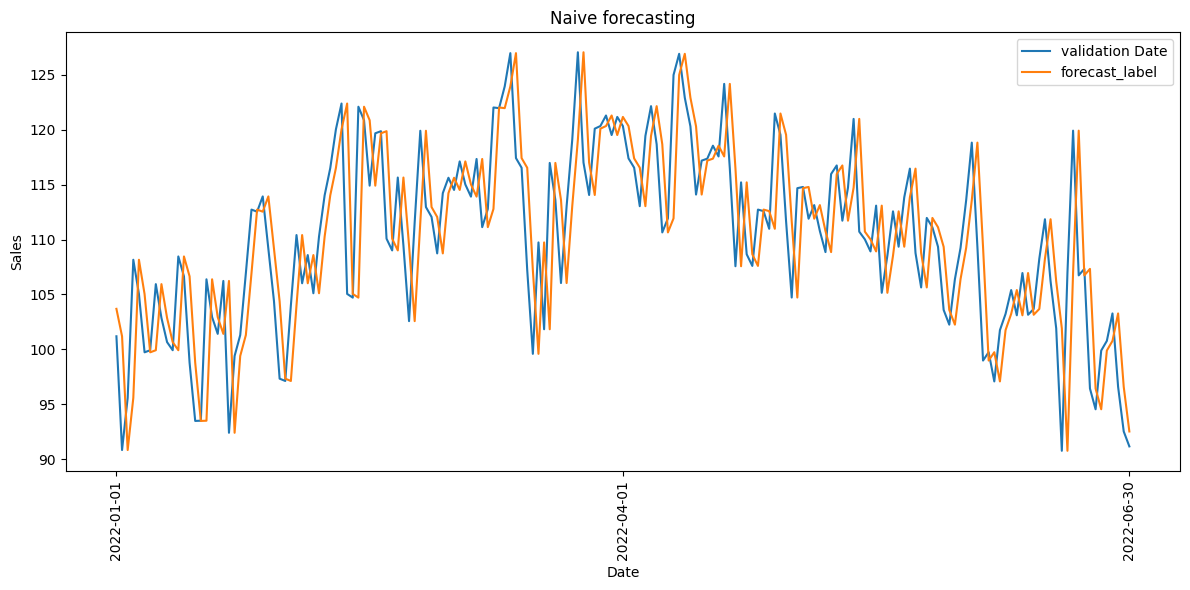

In [32]:
plot(val_df, val_df,  start_date='2022-01-01', end_date='2022-06-30', plot_title='Naive forecasting', forecast_label='Naive forecasting')

In [34]:
mae = tf.keras.metrics.mae(val_df['Sales'], val_df['Naive forecasting']).numpy()
mae

4.874322845417238

In [35]:
mse = tf.keras.metrics.mse(val_df['Sales'], val_df['Naive forecasting']).numpy()
mse

38.193970588235295